# Libraries & Functions

In [2]:
'''Math & Data Libraries'''
import numpy as np
import pandas as pd

In [3]:
'''Visualization Libraries'''
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

sns.set_style("whitegrid", {"grid.color": "0.5", "axes.edgecolor": "0.2"})
color_palette = ["#FF8853", "#FFE174", "#007597", "#C1C36D", "#00A697", "#BC97E0", "#ffc0bf"] #[ "#007597", "#FF8853", "#C1C36D", "#FFE174","#00A697", "#BC97E0", "#ffc0bf"]
sns.set_palette(sns.color_palette(color_palette))

In [4]:
def show_values_on_bars(axs, size=14):
    def _show_on_single_plot(ax, size=size):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = max(p.get_y() + p.get_height() - 5, 0.1)
            value = '{:.2f}'.format(p.get_height())
            # print(_y, p.get_facecolor())
            blue_col = p.get_facecolor()[2]
            green_col = p.get_facecolor()[1]
#             if(p.get_height()<0.2):
#                 continue
            if(green_col>0.5):# or green_col<0.4):
                ax.text(_x, _y, value, ha="center", size=size) 
            else:
                ax.text(_x, _y, value, ha="center", size=size, color="white")
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# Result Data

## Group Results

In [5]:
df_results_full = pd.read_excel("Results/Results.xlsx")

# Model Comparison

C:\Users\Admin\AppData\Local\Temp\ipykernel_88832\3415373035.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(np.round(np.arange(0, 41, 5), 1), size=18)


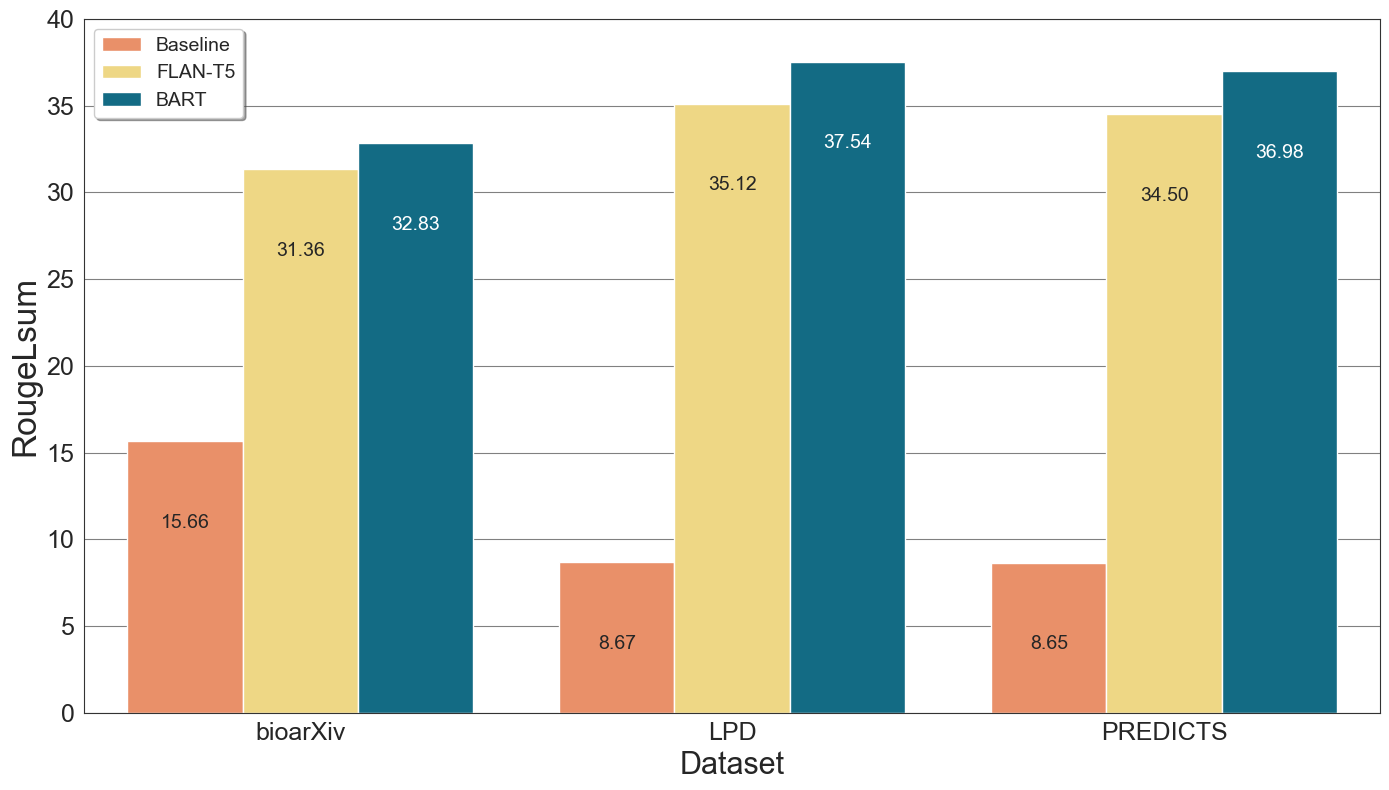

In [9]:
for metric in ["RougeLsum"]:
    df_subset = df_results_full
    fig, axes  = plt.subplots(figsize=(14,8), nrows = 1)
    sns.barplot(data=df_subset, x="Dataset", y=metric, hue = "Model", palette = color_palette)
    show_values_on_bars(axes)
    axes.set_xticklabels(axes.get_xticklabels(), size=18, rotation="horizontal")
    axes.set_yticklabels(np.round(np.arange(0, 41, 5), 1), size=18)
    plt.xlabel("Dataset", size = 22)
    plt.ylabel(metric, size=24)
    plt.ylim(0, 40)
    plt.tight_layout()
    plt.legend(loc = "upper left", fontsize = 14, fancybox = True, shadow = True)
    plt.show()